In [48]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from time import time
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline 

In [3]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

In [4]:
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

In [5]:
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

In [6]:
count_vect = CountVectorizer(min_df = 3, stop_words = 'english')

In [7]:
X = count_vect.fit_transform(dataset.data)

In [9]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
print(X_tfidf.shape)

(7882, 27768)


In [17]:
kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 100)

In [39]:
t0 = time()
kmeans_clf.fit(X_tfidf)
print("done in %0.3fs" % (time() - t0))

KeyboardInterrupt: 

In [21]:
###### Generate labels####
y = np.zeros((len(dataset.data)))
for i in range(len(dataset.target)):
    if(dataset.target[i] <= 3):
        y[i] = 0
    else:
        y[i] = 1

In [22]:
contingency_matrix(y, kmeans_clf.labels_)

array([[3896,    7],
       [3979,    0]])

In [31]:
print("The homogenity score is " + str(homogeneity_score(y, kmeans_clf.labels_)))
print("The completeness score is " + str(completeness_score(y, kmeans_clf.labels_)))
print("The V-measure score is " + str(v_measure_score(y, kmeans_clf.labels_)))
print("The adjusted Rand Index score is " + str(adjusted_rand_score(y, kmeans_clf.labels_)))
print("The adjusted mutual information score is " + str(adjusted_mutual_info_score(y, kmeans_clf.labels_)))

The homogenity score is 0.0009011545526278239
The completeness score is 0.08762656545005139
The V-measure score is 0.0017839627719784036
The adjusted Rand Index score is 3.7291035182417234e-05


C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


The adjusted mutual information score is 0.0008006273551528023


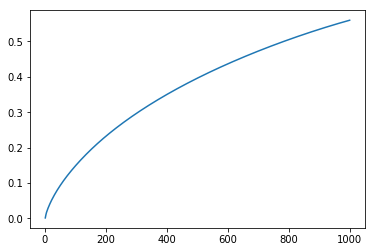

In [41]:
svd = TruncatedSVD(n_components=1000, random_state=0)
X_svd = svd.fit_transform(X_tfidf)
var_retained = svd.explained_variance_ratio_.cumsum()
plt.plot(range(1, 1001), var_retained)
plt.show()

In [45]:
np.shape(X_svd[:, :50])

(7882, 50)

In [46]:
#################################################
### Find the scores for different values of r ###
#################################################

svd_homo_score = []
svd_comp_score = []
svd_v_measure = []
svd_adj_rand = []
svd_mi_score = []

dim = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for d in dim:
    #svd = TruncatedSVD(n_components=1000, random_state=0)
    #X_svd = svd.fit_transform(X_tfidf)
    kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 100)
    kmeans_clf.fit(X_svd[:, :d])
    
    svd_homo_score.append(homogeneity_score(y, kmeans_clf.labels_))
    svd_comp_score.append(completeness_score(y, kmeans_clf.labels_))
    svd_v_measure.append(v_measure_score(y, kmeans_clf.labels_))
    svd_adj_rand.append(adjusted_rand_score(y, kmeans_clf.labels_))
    svd_mi_score.append(adjusted_mutual_info_score(y, kmeans_clf.labels_))

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior 

In [49]:
#################################################
### Find the scores for different values of r ###
#################################################

nmf_homo_score = []
nmf_comp_score = []
nmf_v_measure = []
nmf_adj_rand = []
nmf_mi_score = []

dim = [1, 2, 3, 5, 10, 20, 50, 100, 300]

for d in dim:
    nmf = NMF(n_components=d, init='random', random_state=0)
    X_nmf = nmf.fit_transform(X_tfidf)
    kmeans_clf = KMeans(n_clusters=2, random_state=0, max_iter  = 1000, n_init = 100)
    kmeans_clf.fit(X_nmf[:, :d])
    
    nmf_homo_score.append(homogeneity_score(y, kmeans_clf.labels_))
    nmf_comp_score.append(completeness_score(y, kmeans_clf.labels_))
    nmf_v_measure.append(v_measure_score(y, kmeans_clf.labels_))
    nmf_adj_rand.append(adjusted_rand_score(y, kmeans_clf.labels_))
    nmf_mi_score.append(adjusted_mutual_info_score(y, kmeans_clf.labels_))

C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\rupa\Anaconda2\envs\py36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior 

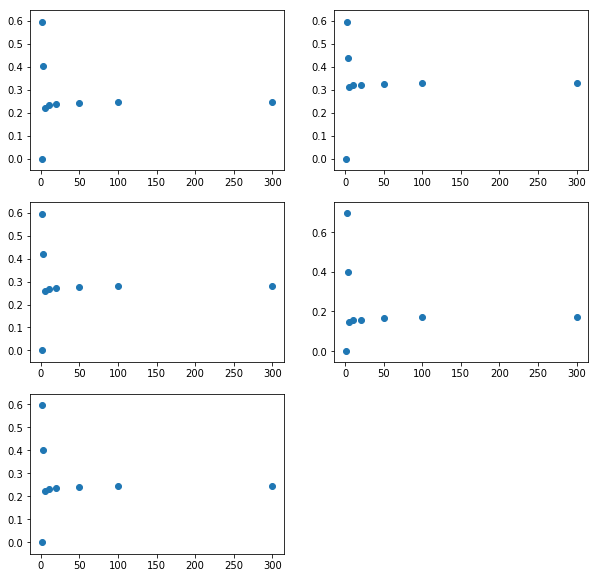

In [61]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), squeeze=False)
axs[0][0].scatter(dim, svd_homo_score)
axs[0][1].scatter(dim, svd_comp_score)
axs[1][0].scatter(dim, svd_v_measure)
axs[1][1].scatter(dim, svd_adj_rand)
axs[2][0].scatter(dim, svd_mi_score)
fig.delaxes(axs[2,1])
plt.show()

In [65]:
svd_homo_score
svd_comp_score
svd_v_measure
svd_adj_rand


[0.00030676745538310953,
 0.6972989173158877,
 0.3991217871734594,
 0.14515583921549685,
 0.15578870288534313,
 0.15860666758469216,
 0.16534887546071145,
 0.16950334937218275,
 0.17265298422025868]

In [64]:
svd_mi_score

[0.00018681004291671216,
 0.5953245615903275,
 0.40282038456778485,
 0.2216231954089647,
 0.23278069754343203,
 0.23526598345354632,
 0.24029975786004792,
 0.24476099442880395,
 0.24660834540445517]

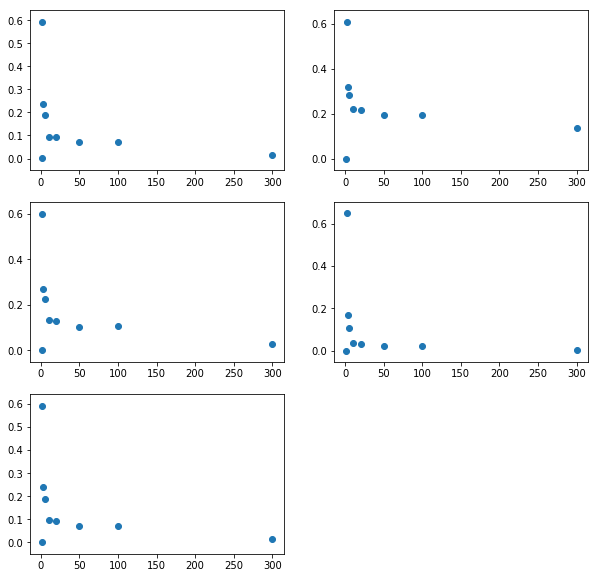

In [62]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), squeeze=False)
axs[0][0].scatter(dim, nmf_homo_score)
axs[0][1].scatter(dim, nmf_comp_score)
axs[1][0].scatter(dim, nmf_v_measure)
axs[1][1].scatter(dim, nmf_adj_rand)
axs[2][0].scatter(dim, nmf_mi_score)
fig.delaxes(axs[2,1])
plt.show()